<ipython-input-3-15d152ea6184>:91: ComplexWarning: Casting complex values to real discards the imaginary part
  condition_numbers[n][l]=condition_number;
<ipython-input-3-15d152ea6184>:29: RuntimeWarning: divide by zero encountered in power
  kernel_vals = np.exp( - (distances/sigma) **p)


[1.         1.10526316 1.21052632 1.31578947 1.42105263 1.52631579
 1.63157895 1.73684211 1.84210526 1.94736842 2.05263158 2.15789474
 2.26315789 2.36842105 2.47368421 2.57894737 2.68421053 2.78947368
 2.89473684 3.        ]
[5.33470634e+01 5.30526751e+01 6.00299074e+01 6.54715681e+01
 6.84205832e+01 8.23707773e+01 9.60478724e+01 1.22106506e+02
 1.46554394e+02 2.86211042e+02 2.74868768e+02 6.21366083e+02
 7.56180941e+02 9.63021392e+02 2.34051668e+03 7.45442761e+03
 1.13661001e+04 1.81564777e+04 2.47697420e+04 8.13707193e+04]


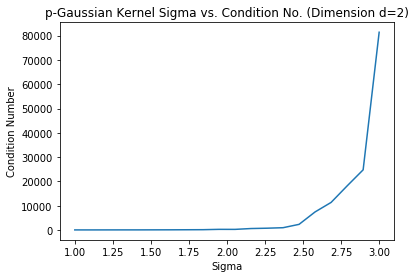

In [3]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10

def transpose(A,B): 
    #B=np.zeros((M,N))
    for i in range(M): 
        for j in range(N): 
            B[i][j] = A[j][i]
    #return B
            
def matrix_multiplication(X, Y,result):
    #result=np.zeros((N,N))
    for i in range(len(X)):
    # iterate through columns of Y
        for j in range(len(Y[0])):
       # iterate through rows of Y
           for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    #return result

def p_gaussian_kernel(distances,p,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **p) 
    return kernel_vals

dim=2
random.seed(42)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
condition_numbers=np.zeros((50,20))
sigmas=np.linspace(1,3,20)

for n in range(50):
    l=0
    for sigma in sigmas:
        #random.seed(actual_data) 
        #actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
        #whitened = whiten(actual_data)
        #book = np.array((whitened[0],whitened[2]))
        centroid, label = kmeans2(actual_data,M,minit='points')

       # print(codebook) #printing centroids

        actual_distances = np.zeros((N,M))


        for row in range(N):
            for col in range(M):
                for i in range(dim):
                    actual_distances[row,col]+=((centroid[col])[i]-(actual_data[row])[i])**2

        for row in range(N):
            for col in range(M):
                actual_distances[row,col]=actual_distances[row,col]**0.5

        d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
        #print(d_5, d_95)
        p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_5/d_95)
        #print(p)
        kernel_vals = p_gaussian_kernel(actual_distances,p,sigma)
        #print(kernel_vals)
        kernel_vals_transpose=np.zeros((M,N))
        transpose(kernel_vals,kernel_vals_transpose)
        k_vals=np.zeros((M,M))
        matrix_multiplication(kernel_vals_transpose,kernel_vals,k_vals)

        #print(k_vals)
        eigvals, eigvecs = la.eig(k_vals)
        #eigvals=eigvals.real
        #print(eigvals)
        singular_values=eigvals**0.5
        #print(singular_values)
        maximum_sv=singular_values[0]

        for s in singular_values:
            if s>maximum_sv:
                maximum_sv=s
        #print(maximum_sv)

        minimum_sv=singular_values[0]
        for s in singular_values:
            if s<minimum_sv:
                minimum_sv=s;
        #print(minimum_sv)
        condition_number=maximum_sv/minimum_sv
        condition_numbers[n][l]=condition_number;
        l=l+1
        #print(maximum_sv/minimum_sv);
        #print(sigma,condition_number)
        
        
#print(condition_numbers)
        
averaged_condition_numbers=np.zeros(20)
temp_sum=0
for col in range(20):
    for row in range(50):
        temp_sum+=condition_numbers[row][col]
    averaged_condition_numbers[col]=temp_sum/50;
    temp_sum=0;
print(sigmas)
print(averaged_condition_numbers)
fig, ax = plt.subplots()
ax.set_title("p-Gaussian Kernel Sigma vs. Condition No. (Dimension d="+str(dim)+")")
plt.plot(sigmas,averaged_condition_numbers)
ax.set_xlabel('Sigma')
ax.set_ylabel('Condition Number')
plt.savefig('p-Gaussian Kernel conditioning for dimension 2')

plt.show()

            
    

<ipython-input-4-9eeb5d5e9834>:95: ComplexWarning: Casting complex values to real discards the imaginary part
  condition_numbers[n][l]=condition_number;
<ipython-input-4-9eeb5d5e9834>:29: RuntimeWarning: divide by zero encountered in power
  kernel_vals = np.exp( - (distances/sigma) **p)


[1.         1.10526316 1.21052632 1.31578947 1.42105263 1.52631579
 1.63157895 1.73684211 1.84210526 1.94736842 2.05263158 2.15789474
 2.26315789 2.36842105 2.47368421 2.57894737 2.68421053 2.78947368
 2.89473684 3.        ]
[4.16677938e+06 2.25683024e+07 2.29969159e+07 1.03769003e+07
 1.83926280e+06 4.07817650e+05 1.19751255e+05 3.45080431e+04
 1.05731579e+04 3.10847631e+03 1.24717624e+03 4.52231642e+02
 1.82690034e+02 9.38331051e+01 4.77919831e+01 3.21645370e+01
 2.37230237e+01 1.80010741e+01 1.48678436e+01 1.25893321e+01]


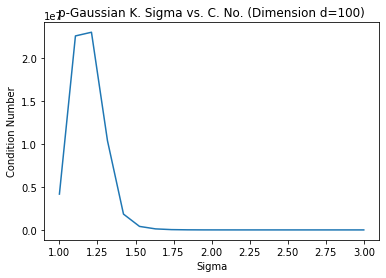

In [4]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10

def transpose(A,B): 
    #B=np.zeros((M,N))
    for i in range(M): 
        for j in range(N): 
            B[i][j] = A[j][i]
    #return B
            
def matrix_multiplication(X, Y,result):
    #result=np.zeros((N,N))
    for i in range(len(X)):
    # iterate through columns of Y
        for j in range(len(Y[0])):
       # iterate through rows of Y
           for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    #return result

def p_gaussian_kernel(distances,p,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **p) 
    return kernel_vals

dim=100
random.seed(42)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
condition_numbers=np.zeros((50,20))
sigmas=np.linspace(1,3,20)

for n in range(50):
    l=0
    for sigma in sigmas:
        #random.seed(actual_data) 
        #actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))
        #whitened = whiten(actual_data)
        #book = np.array((whitened[0],whitened[2]))
        centroid, label = kmeans2(actual_data,M,minit='points')

       # print(codebook) #printing centroids

        actual_distances = np.zeros((N,M))


        for row in range(N):
            for col in range(M):
                for i in range(dim):
                    actual_distances[row,col]+=((centroid[col])[i]-(actual_data[row])[i])**2

        for row in range(N):
            for col in range(M):
                actual_distances[row,col]=actual_distances[row,col]**0.5

        d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
        #print(d_5, d_95)
        p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_5/d_95)
        #print(p)
        kernel_vals = p_gaussian_kernel(actual_distances,p,sigma)
        #print(kernel_vals)
        kernel_vals_transpose=np.zeros((M,N))
        transpose(kernel_vals,kernel_vals_transpose)
        k_vals=np.zeros((M,M))
        matrix_multiplication(kernel_vals_transpose,kernel_vals,k_vals)

        #print(k_vals)
        eigvals, eigvecs = la.eig(k_vals)
        #eigvals=eigvals.real
        #print(eigvals)
        singular_values=eigvals**0.5
        #print(singular_values)
        maximum_sv=singular_values[0]

        for s in singular_values:
            if s>maximum_sv:
                maximum_sv=s
        #print(maximum_sv)

        minimum_sv=singular_values[0]
        for s in singular_values:
            if s<minimum_sv:
                minimum_sv=s;
        
        #print(minimum_sv)
        if (minimum_sv==0):
            minimum_sv=0.1
            
        condition_number=maximum_sv/minimum_sv
        condition_numbers[n][l]=condition_number;
        l=l+1
        #print(maximum_sv/minimum_sv);
        #print(sigma,condition_number)
        
        
#print(condition_numbers)
        
averaged_condition_numbers=np.zeros(20)
temp_sum=0
for col in range(20):
    for row in range(50):
        temp_sum+=condition_numbers[row][col]
    averaged_condition_numbers[col]=temp_sum/50;
    temp_sum=0;
print(sigmas)
print(averaged_condition_numbers)
fig, ax = plt.subplots()
ax.set_title("p-Gaussian K. Sigma vs. C. No. (Dimension d="+str(dim)+")")
plt.plot(sigmas,averaged_condition_numbers)
ax.set_xlabel('Sigma')
ax.set_ylabel('Condition Number')
plt.savefig('p-Gaussian Kernel conditioning for dimension 100')
plt.show()

            
    